In [133]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [134]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='liac-arff')

In [135]:
X_total = mnist.data.astype("float64")
X_total.shape

(70000, 784)

In [136]:
y_total = mnist.target.astype("int64")
y_total.shape

(70000,)

In [137]:
def plot_histogram( vals, xlabel = "Digit", ylabel = "Frequency", title = "Frequency Distribution of Digits in MNIST Dataset" ):
    # Count frequencies of each digit
    elems, counts = np.unique(vals, return_counts=True)
    
    # Create a bar chart (more suitable for discrete categories like digits)
    plt.figure(figsize=(10, 6))
    plt.bar(elems, counts, color='skyblue', edgecolor='black', width=0.8)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(elems) # Ensure all digits 0-9 are shown as ticks (if they all exist in data)
    # If you want to ensure ticks from 0 to 9 regardless of data presence:
    # plt.xticks(np.arange(10))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # To save the plot to a file:
    # plt.savefig("mnist_target_histogram.png")
    
    # To display the plot:
    plt.show()

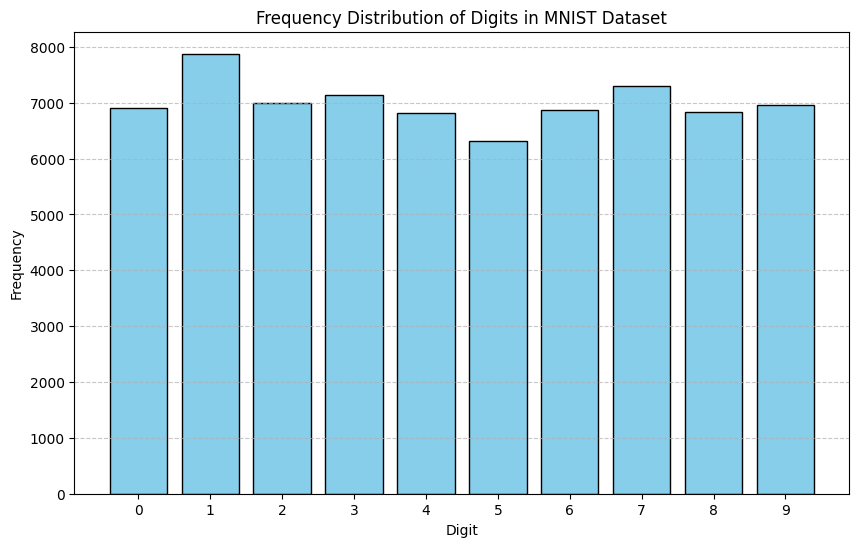

In [138]:
plot_histogram(y_total)

In [139]:
X_train, X_test, y_train, y_test = train_test_split( X_total, y_total, test_size=10000, random_state=42, stratify=y_total )

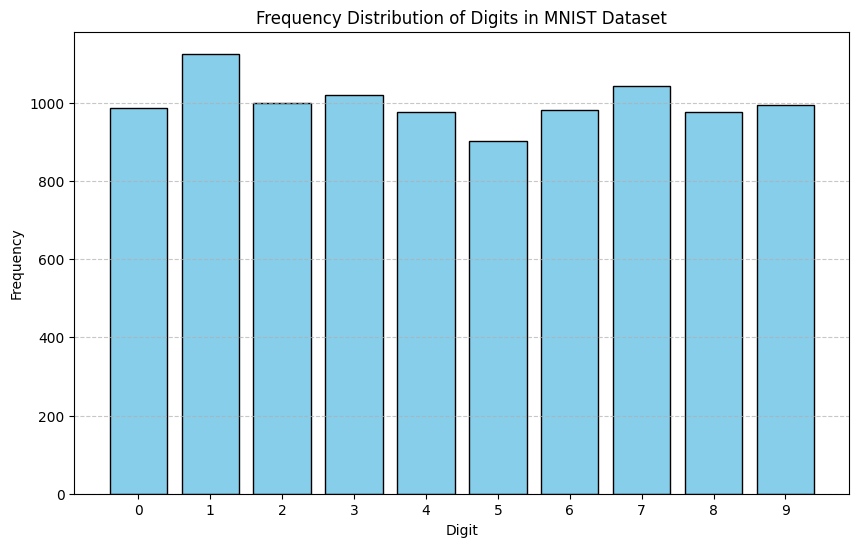

In [140]:
plot_histogram(y_test)

In [10]:
np.savez( "test.npz", data=X_test, targets=y_test )

In [11]:
np.savez( "train_base.npz", data=X_train, targets=y_train )

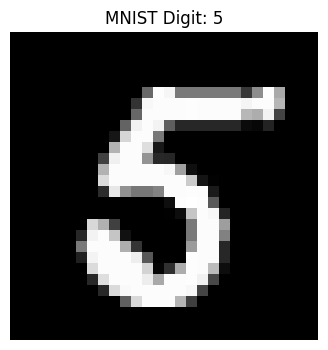

In [141]:
#Plot training example
idx = 5
image = X_train[idx].reshape(28,28)

plt.figure(figsize=(4, 4)) # Set figure size for better display
plt.imshow(image, cmap='gray') # 'gray' colormap is suitable for grayscale images
plt.title(f"MNIST Digit: {y_train[idx]}")
plt.axis('off') # Turn off axis ticks and labels for cleaner display
plt.show()

Data Augmentation

In [142]:
import torch
from torchvision.transforms import v2

In [143]:
X_train_tensor = torch.from_numpy(X_train)
X_train_tensor = X_train_tensor.view(-1,1,28,28)

In [144]:
X_train_tensor.shape

torch.Size([60000, 1, 28, 28])

(<matplotlib.image.AxesImage at 0x140c5f890>, np.int64(9))

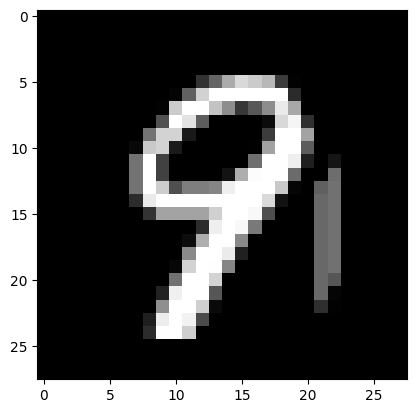

In [147]:
plt.imshow(X_train_tensor[1].squeeze(), cmap='gray'), y_train[1]

In [118]:
transforms = v2.Compose([
    v2.RandomRotation(degrees=20),
    v2.RandomResizedCrop(size=(28, 28), scale=(0.8, 0.8)),
])

In [119]:
X_train_new = transforms(X_train_tensor)

(<matplotlib.image.AxesImage at 0x1410a3750>, np.int64(9))

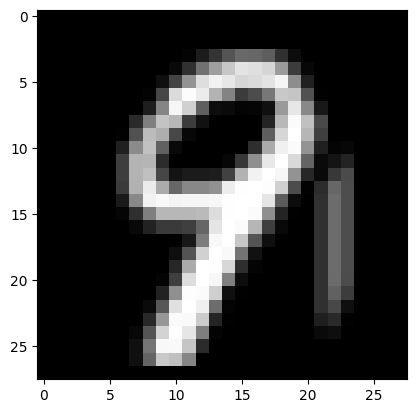

In [155]:
plt.imshow(X_train_new[1].squeeze(), cmap="gray"), y_train[1]

In [156]:
X_train_augmented = torch.concat([X_train_tensor,X_train_new]).reshape(-1,28*28).numpy()
X_train_augmented.shape

(120000, 784)

In [157]:
y_train

array([6, 9, 8, ..., 1, 8, 6], shape=(60000,))

In [159]:
y_train_augmented = np.append(y_train,y_train)
y_train_augmented.shape

(120000,)

In [161]:
np.savez( "train_aug.npz", data=X_train_augmented, targets=y_train_augmented )